# Exploratory Data Analysis: Global SuperStore Data
Author: Pablo Casero Palmero

I have chosen the datset [Global SuperStore Data](https://www.kaggle.com/datasets/rohitgrewal/global-superstore-data/data). This dataset contains three parts:
- Orders: Contains detailed records of customer orders.
- Returns: Lists orders that have been returned.
- People: Maps sales personnel to specific sales regions.

In [2]:
!pip install kaggle

In [17]:
!pip install openpyxl

  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)


In [8]:
!kaggle datasets download rohitgrewal/global-superstore-data

Dataset URL: https://www.kaggle.com/datasets/rohitgrewal/global-superstore-data
License(s): DbCL-1.0




  0%|          | 0.00/6.93M [00:00<?, ?B/s]
100%|##########| 6.93M/6.93M [00:00<00:00, 1.56GB/s]


In [11]:
!unzip rohitgrewal/global-superstore-data.zip

"unzip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [ ]:
import pandas as pd
df_orders = pd.read_excel('data/Global Superstore Data.xlsx', sheet_name='Orders')
df_returns = pd.read_excel('data/Global Superstore Data.xlsx', sheet_name='Returns')
df_people = pd.read_excel('data/Global Superstore Data.xlsx', sheet_name='People')
print(df_orders.head())

We must join the tables Orders and retrurns by the Order ID which is the column in common with all the tables, but if we want to join with table People we should do it by Region. Let's see the uniques values from the tables and how many unique customers

In [149]:
print('Orders Unique: ', df_orders['Order ID'].nunique())
print('Returns Unique: ', df_returns['Order ID'].nunique())
print('Region Unique: ', df_people['Region'].nunique())

Orders Unique:  25728
Returns Unique:  1970
Region Unique:  24


As a result, we obtain a final table

In [153]:
order_return  = pd.merge(df_orders, df_returns,on = 'Order ID' , how='left')
order_return.drop(['Region_y'],axis=1, inplace=True)
order_return.rename(columns={'Region_x': 'Region'},inplace=True)
df = pd.merge(order_return, df_people,on = 'Region' , how='left')
df.reset_index(drop= True , inplace=True)
display(df.head(5))

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Person
0,24599,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,Bookcases,Furniture,731.82,2,0.0,102.42,39.66,Medium,Yes,Chandrakant Chaudhri
1,29465,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,Supplies,Office Supplies,243.54,9,0.0,104.49,18.72,Medium,NaN,Chandrakant Chaudhri
2,24598,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,Machines,Technology,346.32,3,0.0,13.77,14.10,Medium,Yes,Chandrakant Chaudhri
3,24597,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,Furnishings,Furniture,169.68,4,0.0,79.68,11.01,Medium,Yes,Chandrakant Chaudhri
4,29464,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,Envelopes,Office Supplies,203.88,4,0.0,24.36,5.72,Medium,NaN,Chandrakant Chaudhri


## 1.Data Preprocessing
We should take a look into data a get a few conclusions and rename columns. In this point we should rename it without spaces between names

In [154]:
df.columns = df.columns.str.replace(' ', '_')

### 1.1 Distribution of variables
We separate numerical from categorical variables and check the distributions

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51593 entries, 0 to 51592
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row_ID          51593 non-null  int64         
 1   Order_ID        51593 non-null  object        
 2   Order_Date      51593 non-null  datetime64[ns]
 3   Ship_Date       51593 non-null  datetime64[ns]
 4   Ship_Mode       51593 non-null  object        
 5   Customer_ID     51593 non-null  object        
 6   Customer_Name   51593 non-null  object        
 7   Segment         51593 non-null  object        
 8   Postal_Code     10078 non-null  float64       
 9   City            51593 non-null  object        
 10  State           51593 non-null  object        
 11  Country         51593 non-null  object        
 12  Region          51593 non-null  object        
 13  Market          51593 non-null  object        
 14  Product_ID      51593 non-null  object        
 15  Pr

In [156]:
categorical =df.select_dtypes(include=['object']).columns
numerical = df.select_dtypes(exclude=['object', 'datetime64[ns]']).columns

#### 1.1.1 Numeric Variables

In [157]:
df[numerical].describe()

,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51593.000000,10078.000000,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000
mean,25640.579381,55236.456936,246.922736,3.477100,0.142907,28.570977,26.520320
std,14804.696861,32085.386801,489.025699,2.278033,0.212317,174.982110,57.296241
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,12811.000000,23040.750000,30.800000,2.000000,0.000000,0.000000,2.610000
50%,25661.000000,57103.000000,85.140000,3.000000,0.000000,9.240000,7.800000
75%,38464.000000,90008.000000,251.370000,5.000000,0.200000,36.840000,24.510000
max,51290.000000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


Let's remove column ID or Postal Code

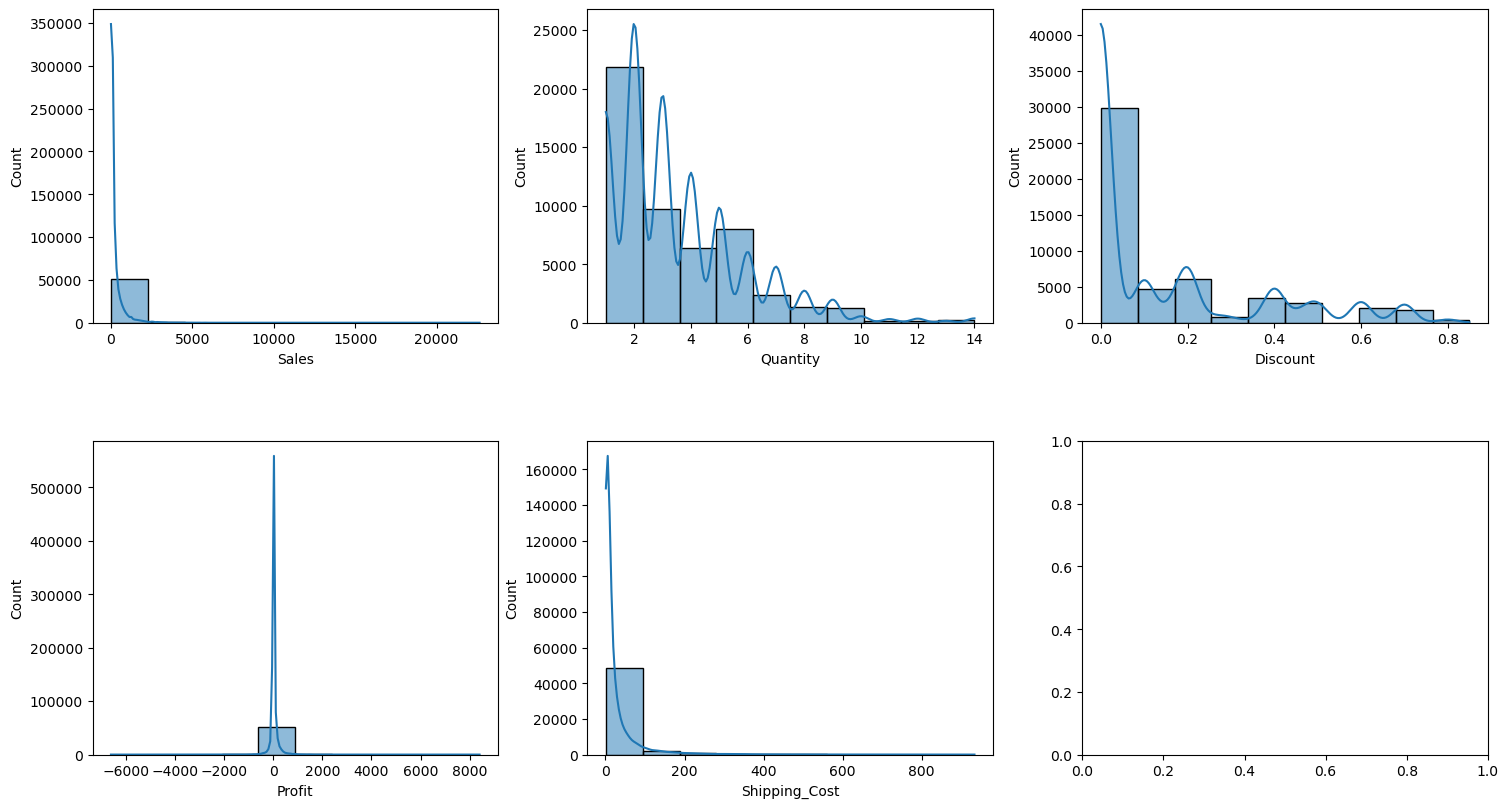

In [158]:
#Numerical Variables
numerical_fit = numerical.drop(['Row_ID','Postal_Code'])
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 8))
axs = axs.flatten() # 

index = 0
for k,v in df[numerical_fit].items(): 
    sns.histplot(v, bins=10, ax=axs[index], kde=True)
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [159]:
df[categorical].describe()

,Order_ID,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Country,Region,Market,Product_ID,Product_Name,Sub-Category,Category,Order_Priority,Returned,Person
count,51593,51593,51593,51593,51593,51593,51593,51593,51593,51593,51593,51593,51593,51593,51593,6055,51209
unique,25728,4,17415,796,3,3650,1106,165,23,5,3788,3788,17,3,4,1,22
top,IN-2014-SP2062011-41992,Standard Class,SP-2062011,Muhammed Yedwab,Consumer,New York City,California,United States,Western Europe,Asia Pacific,OFF-FA-6129,Staples,Binders,Office Supplies,Medium,Yes,Gilbert Wolff
freq,24,30965,26,115,26647,919,2020,10078,5912,14391,227,227,6181,31462,29602,6055,5912


#### 1.1.2 Categorical Variables

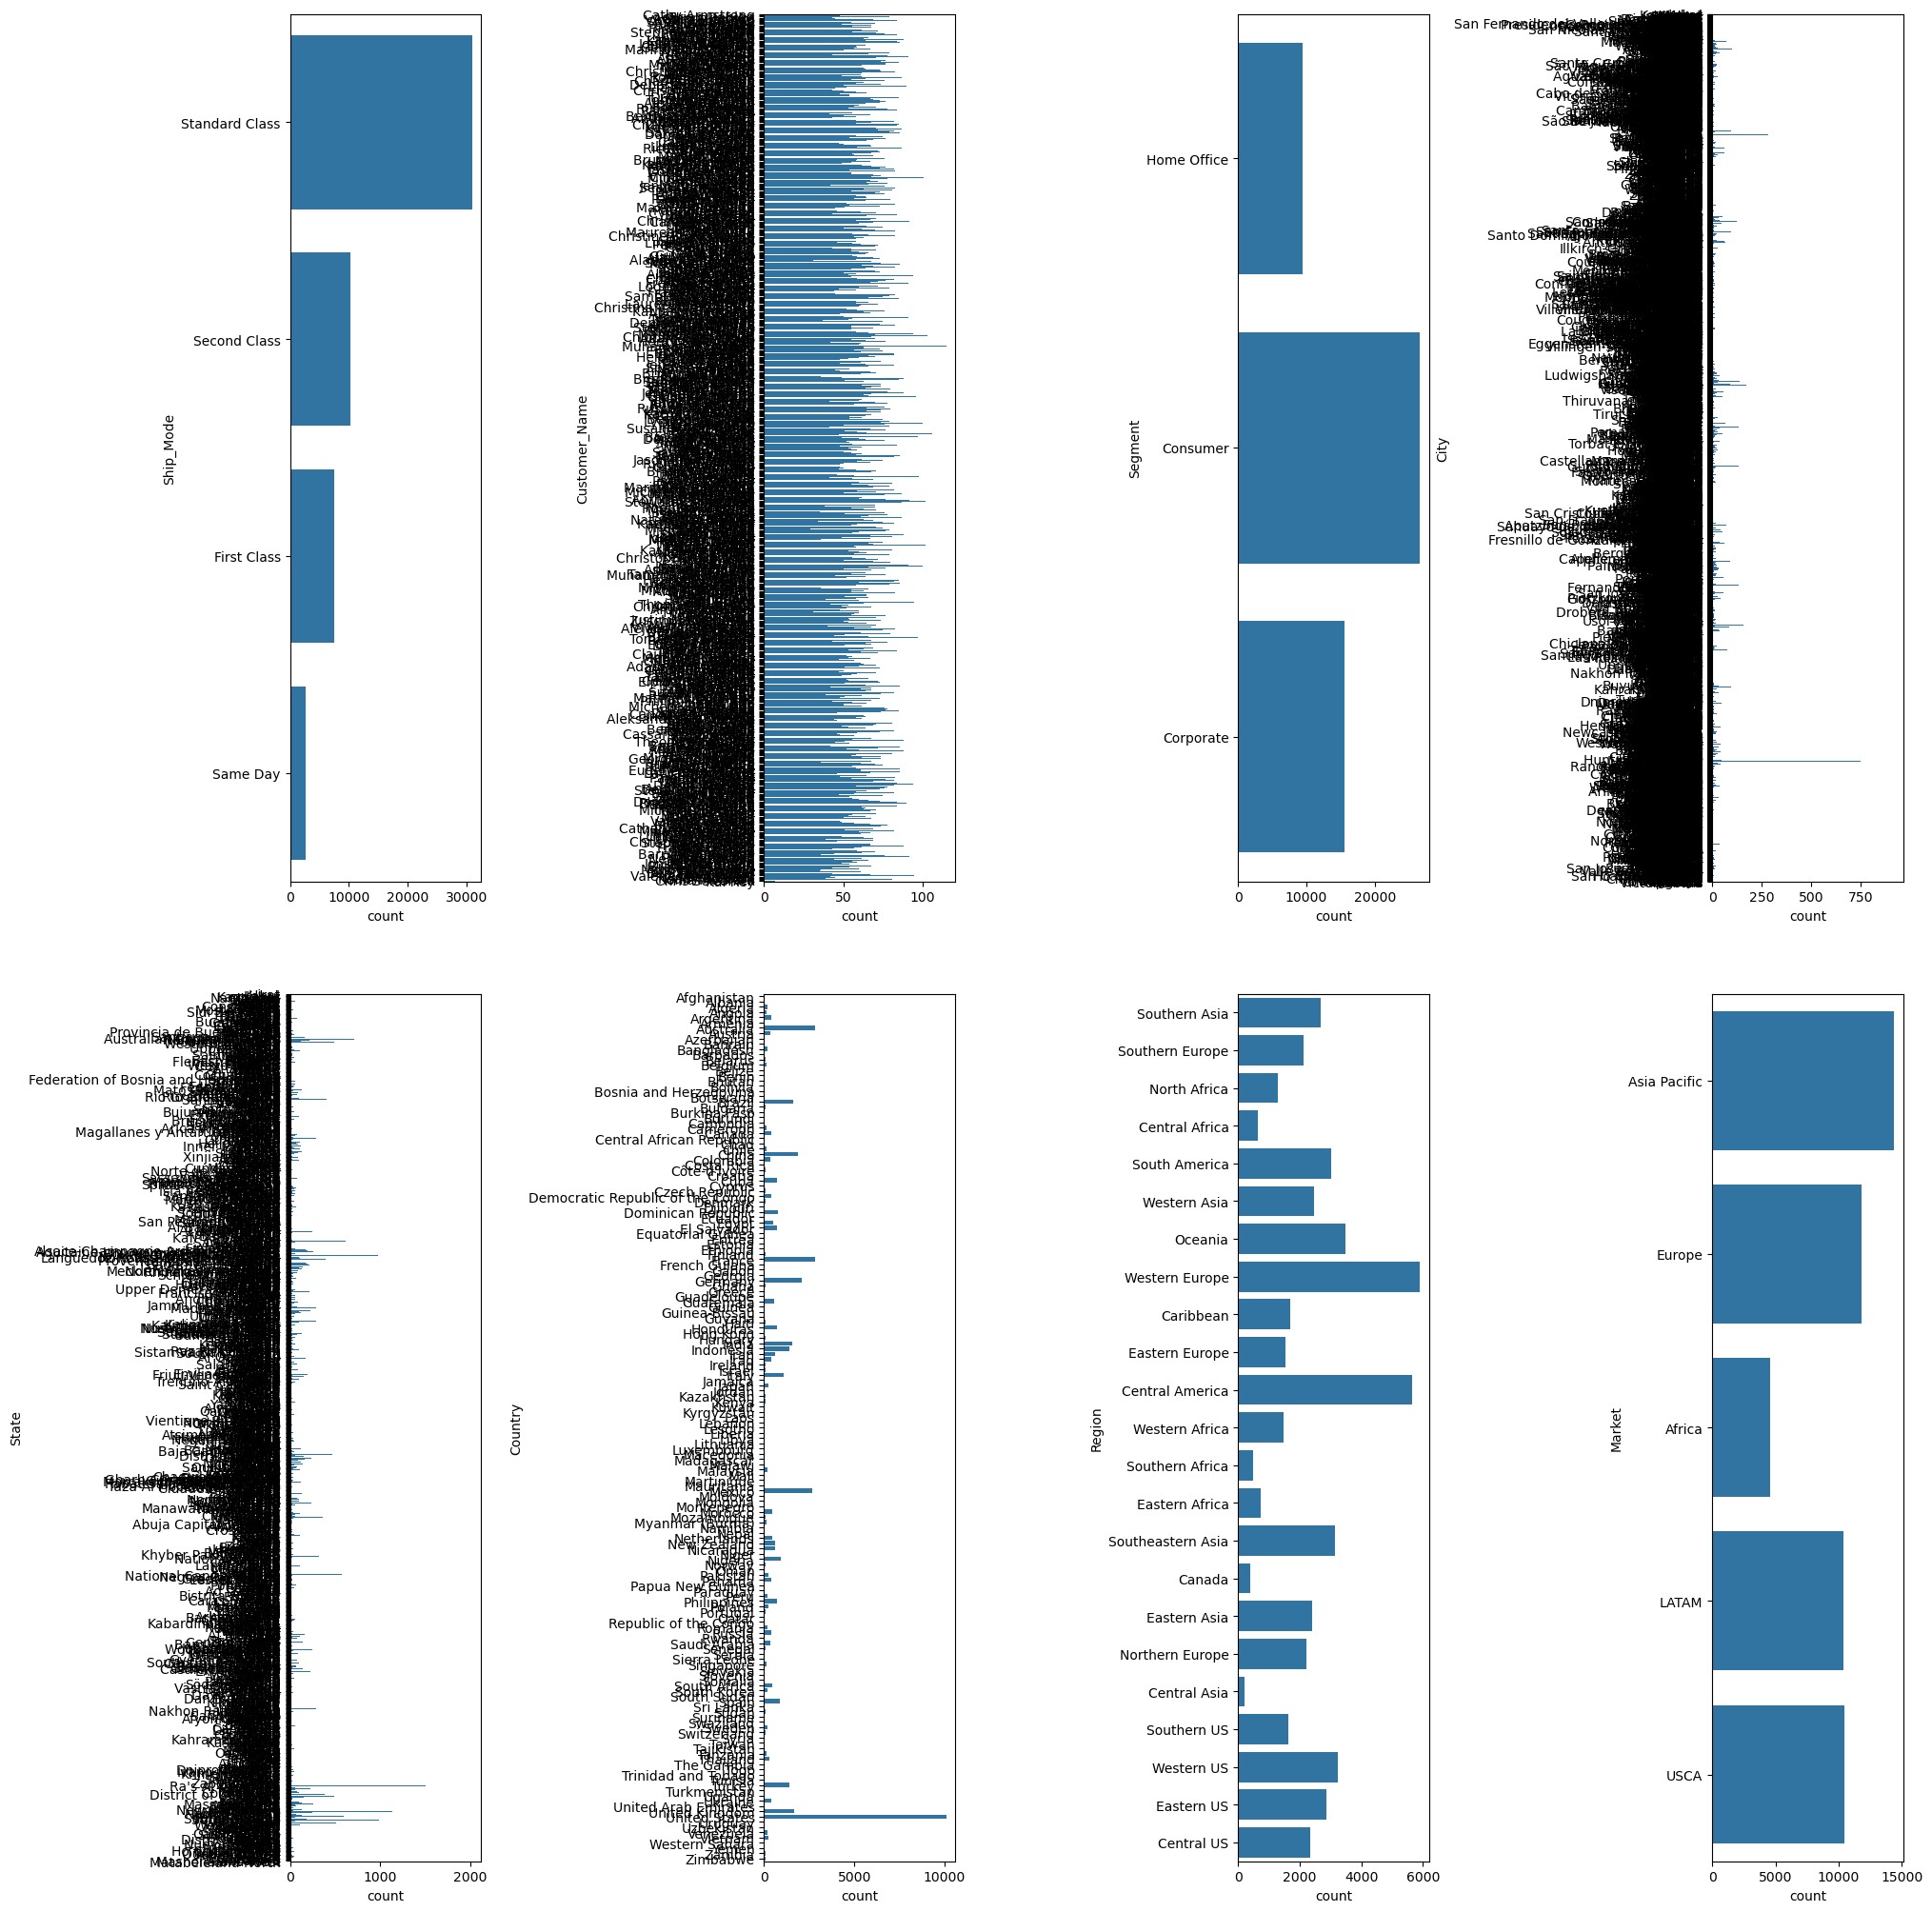

In [160]:
#Categorical Variables
categorical_fit = categorical.drop(['Order_ID','Customer_ID', 'Product_ID', 'Product_Name'])
categorical_fit = categorical_fit[: 8]
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 20))
axs = axs.flatten() # 

index = 0
for k,v in df[categorical_fit].items():
    sns.countplot(v, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

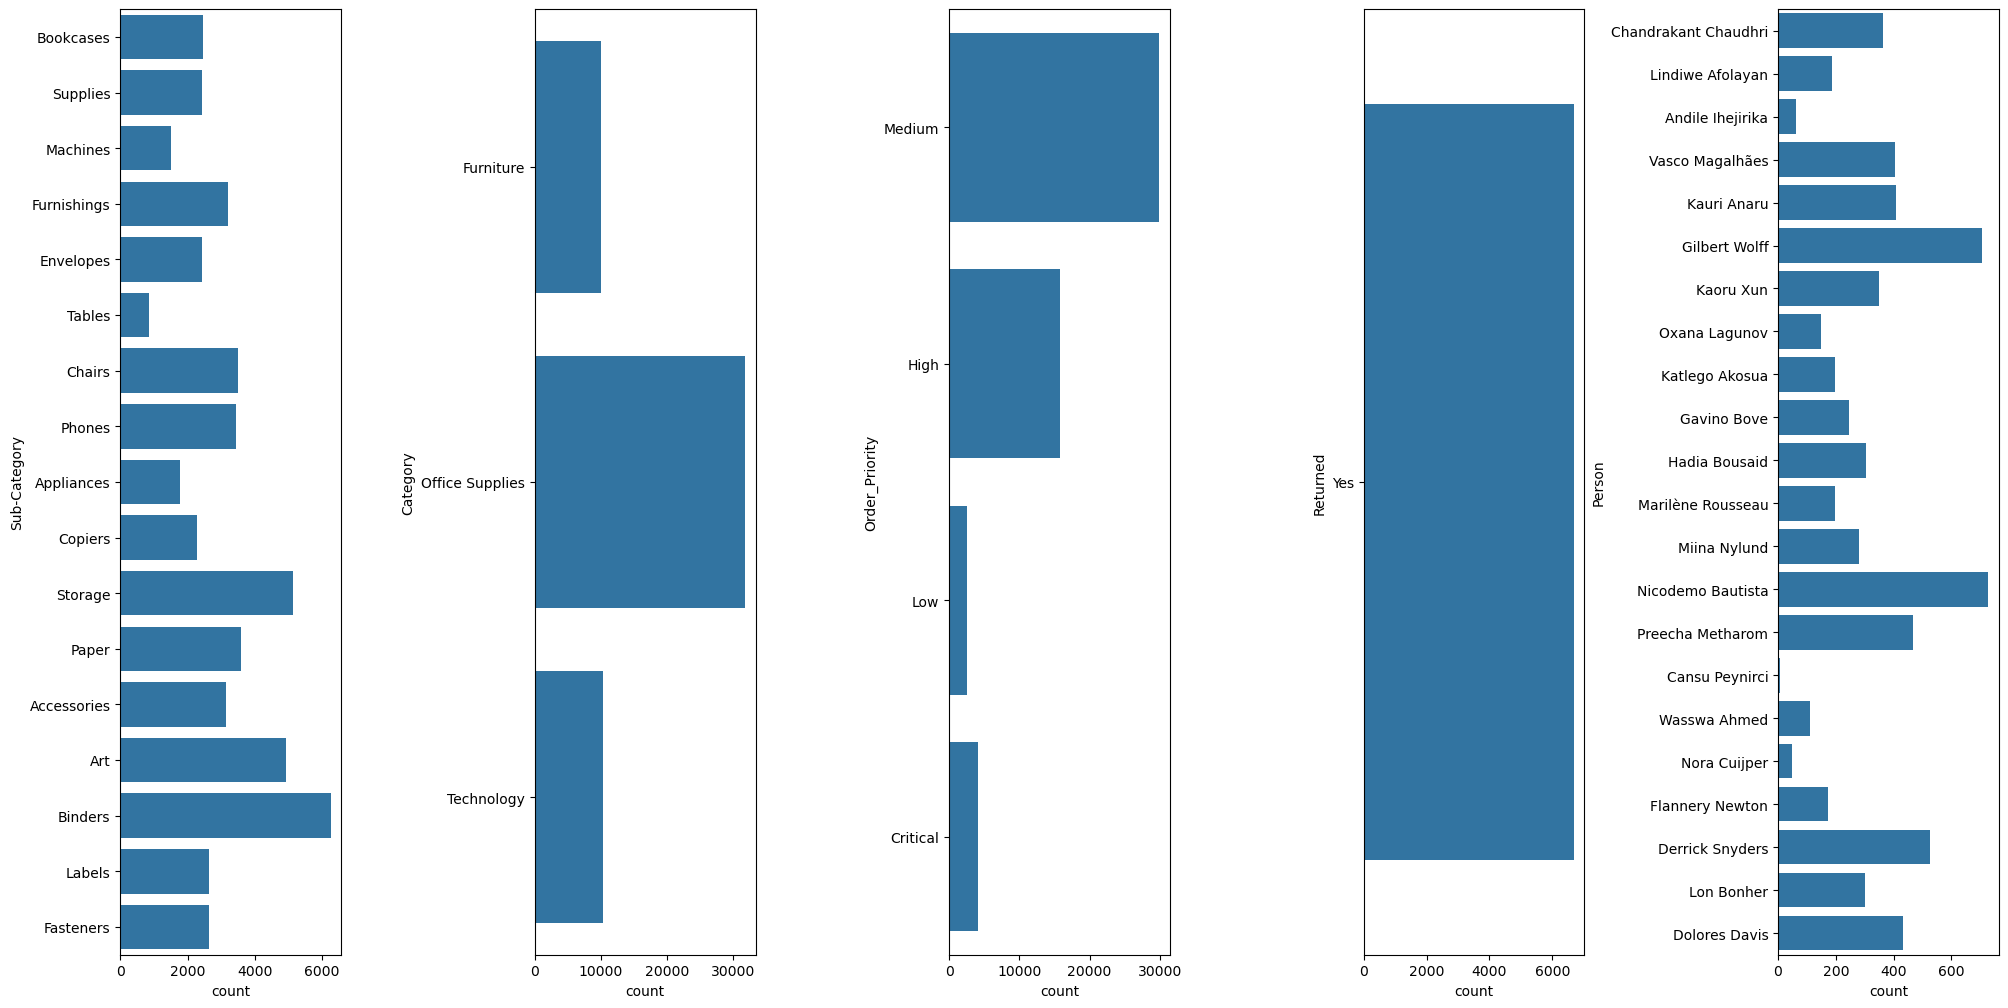

In [59]:
categorical_fit = categorical.drop(['Order_ID','Customer_ID', 'Product_ID', 'Product_Name'])
categorical_fit = categorical_fit[8:]
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
axs = axs.flatten() # 

index = 0
for k,v in df[categorical_fit].items():
    sns.countplot(v, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Comentaries <br>
Most of the ship modes are likely to be standard, consumer-oriented and located in regions such as Asia or Europe. The category preference is Office supplies with priority medium. I would like to point that the Returned variable has only two options and it is not showing the No cases and it is because of null-vales. In case dates i would extract new variables likes days or months if it has an effect on the future model <br>
In case of numerical variables, The Profit variables present a distribution among zero and one and just a few values far away from them (represent tails). The rest of cases present a distribution with positive skewness

### 1.2 Format
We must adapt the format correctly to specific type for each case

In [161]:
df['Order_Date']= pd.to_datetime(df['Order_Date'], format= '%Y-%m-%d')
df['Ship_Date']= pd.to_datetime(df['Ship_Date'], format= '%Y-%m-%d')

### 1.3 Duplicates

In [162]:
df.duplicated().mean(axis=0)

np.float64(0.005872889733103328)

In [163]:
df[df['Row_ID'].duplicated()].sort_values(by='Row_ID', ascending=True)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Returned,Person
32474,77,US-2017-LR16915101-42911,2017-06-25,2017-06-29,Standard Class,LR-16915101,Lena Radford,Consumer,NaN,Lima,...,Supplies,Office Supplies,18.528,2,0.4,-8.352,1.112,Medium,Yes,Vasco Magalhães
32397,78,US-2017-LR16915101-42911,2017-06-25,2017-06-29,Standard Class,LR-16915101,Lena Radford,Consumer,NaN,Lima,...,Storage,Office Supplies,158.760,2,0.4,15.840,12.381,Medium,Yes,Vasco Magalhães
32413,79,US-2017-LR16915101-42911,2017-06-25,2017-06-29,Standard Class,LR-16915101,Lena Radford,Consumer,NaN,Lima,...,Supplies,Office Supplies,121.716,7,0.4,-2.044,7.756,Medium,Yes,Vasco Magalhães
6816,845,MX-2015-BW1120026-42238,2015-08-22,2015-08-25,Second Class,BW-1120026,Ben Wallace,Consumer,NaN,Puente Alto,...,Accessories,Technology,345.900,5,0.0,107.200,40.328,Medium,Yes,Vasco Magalhães
6827,846,MX-2015-BW1120026-42238,2015-08-22,2015-08-25,Second Class,BW-1120026,Ben Wallace,Consumer,NaN,Puente Alto,...,Paper,Office Supplies,10.200,1,0.0,0.000,1.404,Medium,Yes,Vasco Magalhães
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37862,46898,TU-2014-JS5940134-41753,2014-04-24,2014-04-26,First Class,JS-5940134,Joni Sundaresam,Home Office,NaN,Esenyurt,...,Binders,Office Supplies,42.336,2,0.6,-14.844,11.460,Critical,Yes,Kaoru Xun
37867,46899,TU-2014-JS5940134-41753,2014-04-24,2014-04-26,First Class,JS-5940134,Joni Sundaresam,Home Office,NaN,Esenyurt,...,Storage,Office Supplies,18.816,1,0.6,-9.894,5.050,Critical,Yes,Kaoru Xun
37859,46900,TU-2014-JS5940134-41753,2014-04-24,2014-04-26,First Class,JS-5940134,Joni Sundaresam,Home Office,NaN,Esenyurt,...,Storage,Office Supplies,50.784,1,0.6,-73.656,16.210,Critical,Yes,Kaoru Xun
11421,49174,EG-2017-RD966038-43014,2017-10-06,2017-10-08,Second Class,RD-966038,Robert Dilbeck,Home Office,NaN,Al Mahallah al Kubra,...,Copiers,Technology,714.720,2,0.0,235.800,135.230,High,Yes,Lindiwe Afolayan


In [145]:
df[df['Row_ID'].isin([77,2998,3000])]

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Discount,Profit,Shipping_Cost,Order_Priority,Returned,Person,day_posted,month_posted,year_posted,week_posted
670,2998,US-2016-JB160005-42392,2016-01-23,2016-01-25,Second Class,JB-160005,Joy Bell-,Consumer,NaN,Bahía Blanca,...,0.7,-123.558,12.079,High,Yes,Vasco Magalhães,23,1,2016,3
671,2998,US-2016-JB160005-42392,2016-01-23,2016-01-25,Second Class,JB-160005,Joy Bell-,Consumer,NaN,Bahía Blanca,...,0.7,-123.558,12.079,High,Yes,Vasco Magalhães,23,1,2016,3
673,3000,US-2016-JB160005-42392,2016-01-23,2016-01-25,Second Class,JB-160005,Joy Bell-,Consumer,NaN,Bahía Blanca,...,0.4,-30.128,4.974,High,Yes,Vasco Magalhães,23,1,2016,3
674,3000,US-2016-JB160005-42392,2016-01-23,2016-01-25,Second Class,JB-160005,Joy Bell-,Consumer,NaN,Bahía Blanca,...,0.4,-30.128,4.974,High,Yes,Vasco Magalhães,23,1,2016,3
32473,77,US-2017-LR16915101-42911,2017-06-25,2017-06-29,Standard Class,LR-16915101,Lena Radford,Consumer,NaN,Lima,...,0.4,-8.352,1.112,Medium,Yes,Vasco Magalhães,25,6,2017,25
32474,77,US-2017-LR16915101-42911,2017-06-25,2017-06-29,Standard Class,LR-16915101,Lena Radford,Consumer,NaN,Lima,...,0.4,-8.352,1.112,Medium,Yes,Vasco Magalhães,25,6,2017,25


In [164]:
df=df.drop_duplicates().reset_index(drop=True)

Check out this duplicates! Having only 0,5% of duplicates, we are able to remove it

### 1.4 Null Values
We must deal with null values

In [165]:
null_values_mean= df.isna().mean().mean()
print(null_values_mean)

0.06540336247881579


In [166]:
df.isna().mean(axis=0)

Row_ID            0.000000
Order_ID          0.000000
Order_Date        0.000000
Ship_Date         0.000000
Ship_Mode         0.000000
Customer_ID       0.000000
Customer_Name     0.000000
Segment           0.000000
Postal_Code       0.805147
City              0.000000
State             0.000000
Country           0.000000
Region            0.000000
Market            0.000000
Product_ID        0.000000
Product_Name      0.000000
Sub-Category      0.000000
Category          0.000000
Sales             0.000000
Quantity          0.000000
Discount          0.000000
Profit            0.000000
Shipping_Cost     0.000000
Order_Priority    0.000000
Returned          0.887853
Person            0.007487
dtype: float64

We got that only 9% in average are null values from our dataset. But if we deep into the columns, there is 3 of them where we have 80% of null values

In [167]:
df['Returned'].value_counts()

Returned
Yes    5752
Name: count, dtype: int64

In [168]:
df['Returned'].replace(np.nan, 'No', inplace=True)

In [169]:
df['Returned'].value_counts()

Returned
No     45538
Yes     5752
Name: count, dtype: int64

As mentioned above, there is a reason to replace null values, as we assume that we should mark these cases as “No returned”.

In [170]:
df[df['Person'].isna()==True].groupby(['Region'])['Region'].value_counts()

Region
Canada    384
Name: count, dtype: int64

Canada is the only region without sales person associated

### 1.5 Outliers
We talked about this before when we analyze the Profit and Sale variable where we find out some outliers

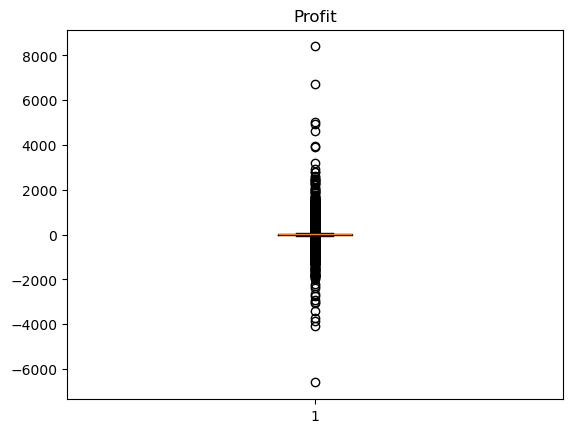

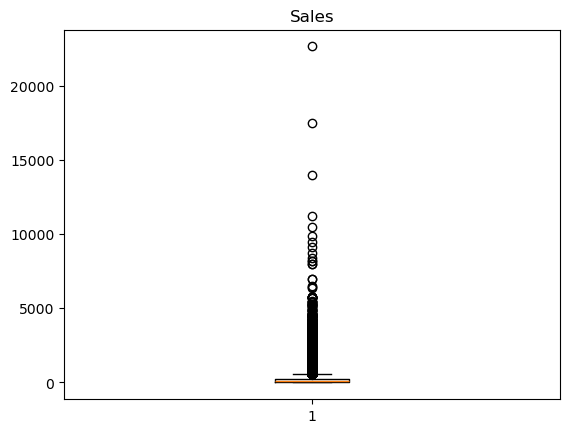

In [171]:
for num in ['Profit','Sales']:
    plt.boxplot(df[num])
    plt.title(num)
    plt.show()

It seems that we found some outliers but we want make sure to the rest of columns

In [172]:
def outliers(df):
    Q1= df.quantile(0.25)
    Q3= df.quantile(0.75)
    IQR= Q3-Q1
    extreme= Q3+IQR*1.5
    outlier= df.query('@df>@extreme')
    outers= df.where(~df.isin(outlier), np.nan)
    return outers.isna().mean()

In [173]:
out_data = outliers(df[numerical])
out_data

Row_ID           0.000000
Postal_Code      0.805147
Sales            0.110255
Quantity         0.017099
Discount         0.081341
Profit           0.121447
Shipping_Cost    0.115208
dtype: float64

I don´t care about ouliers from PostalCode and for the rest of variables I should mantain all data them in order to keep information

### 2. Analysis

We must obtain results from relationships between variables, time series analysis etc

#### 2.1 Correlation

array([[<Axes: xlabel='Sales', ylabel='Sales'>,
        <Axes: xlabel='Quantity', ylabel='Sales'>,
        <Axes: xlabel='Discount', ylabel='Sales'>,
        <Axes: xlabel='Profit', ylabel='Sales'>,
        <Axes: xlabel='Shipping_Cost', ylabel='Sales'>],
       [<Axes: xlabel='Sales', ylabel='Quantity'>,
        <Axes: xlabel='Quantity', ylabel='Quantity'>,
        <Axes: xlabel='Discount', ylabel='Quantity'>,
        <Axes: xlabel='Profit', ylabel='Quantity'>,
        <Axes: xlabel='Shipping_Cost', ylabel='Quantity'>],
       [<Axes: xlabel='Sales', ylabel='Discount'>,
        <Axes: xlabel='Quantity', ylabel='Discount'>,
        <Axes: xlabel='Discount', ylabel='Discount'>,
        <Axes: xlabel='Profit', ylabel='Discount'>,
        <Axes: xlabel='Shipping_Cost', ylabel='Discount'>],
       [<Axes: xlabel='Sales', ylabel='Profit'>,
        <Axes: xlabel='Quantity', ylabel='Profit'>,
        <Axes: xlabel='Discount', ylabel='Profit'>,
        <Axes: xlabel='Profit', ylabel='Profit'>,

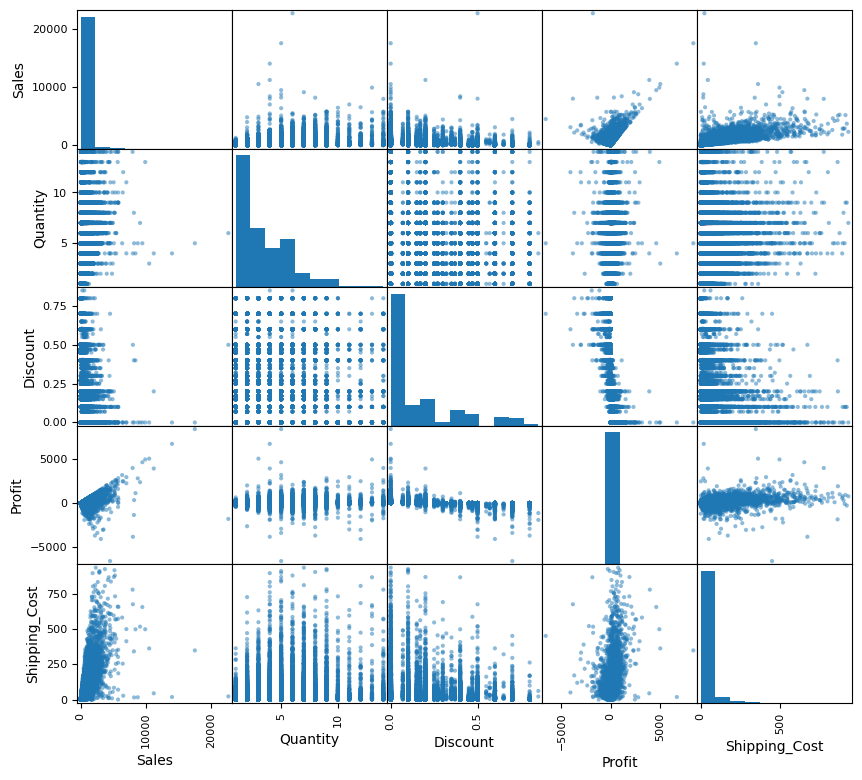

In [174]:
numerical_fit = numerical.drop(['Row_ID','Postal_Code'])
pd.plotting.scatter_matrix(df[numerical_fit], figsize=(10,9))

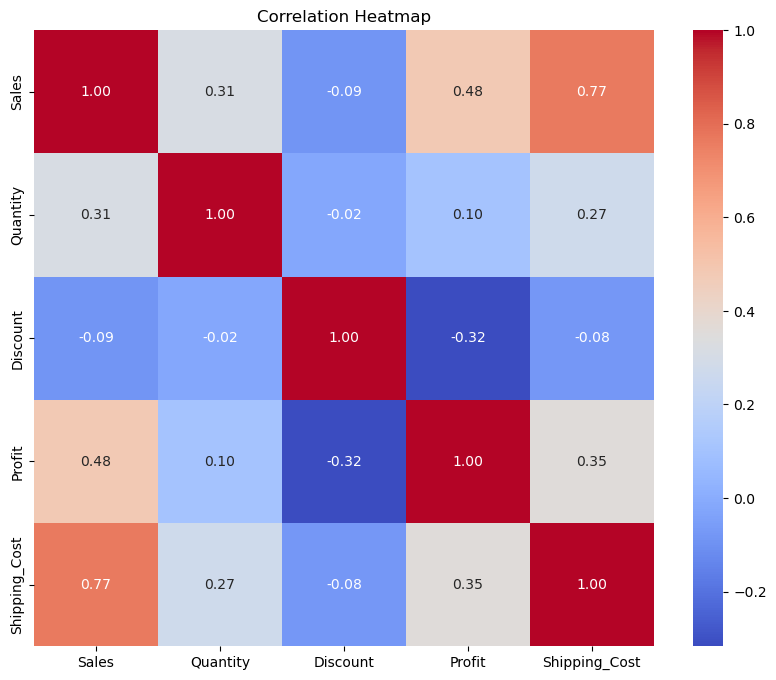

In [176]:
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_fit].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The variable Profit is positively correlated with Shipping cost, which means that if we spend more on shipping, we will probably make more profit. The other positive correlation is between Sales and Profit which makes more sense if we talk in financial terms 

In [178]:
cross_tab = pd.crosstab(index=df['Category'],columns=df['Returned'])
print(cross_tab)

Returned            No   Yes
Category                    
Furniture         8758  1102
Office Supplies  27757  3532
Technology        9023  1118


In [179]:
cross_tab = pd.crosstab(index=df['Order_Priority'],columns=df['Returned'])
print(cross_tab)

Returned           No   Yes
Order_Priority             
Critical         3481   451
High            13826  1675
Low              2172   252
Medium          26059  3374


In [180]:
cross_tab = pd.crosstab(index=df['Order_Priority'],columns=df['Category'])
print(cross_tab)

Category        Furniture  Office Supplies  Technology
Order_Priority                                        
Critical              721             2447         764
High                 2924             9473        3104
Low                   477             1487         460
Medium               5738            17882        5813


It is probable to get returned in case of a Office suplies from a medium priority order which is the most common in all the cases no matter the category of order

#### 2.2 Time series
We start looking at the price and temporal analysis in month, days, year

In [181]:
df['day_posted'] = df['Order_Date'].dt.day
df['week_posted'] = df['Order_Date'].dt.isocalendar().week
df['month_posted'] = df['Order_Date'].dt.month
df['year_posted'] = df['Order_Date'].dt.year

<Axes: xlabel='Day'>

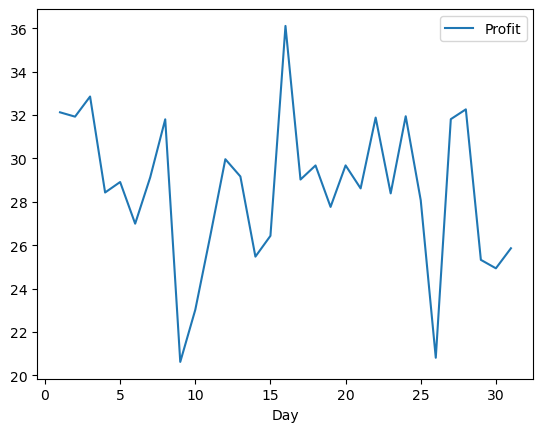

In [189]:
profit_and_day= df.pivot_table(index= 'day_posted', values='Profit', aggfunc='mean').reset_index()
profit_and_day.columns=['Day', 'Profit']
profit_and_day.plot(kind='line', x='Day', y='Profit')

<Axes: xlabel='Week'>

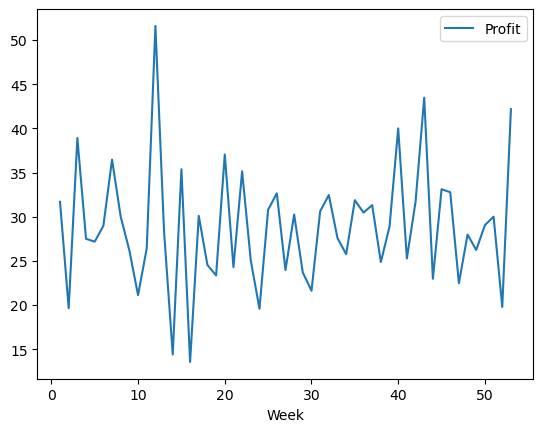

In [190]:
profit_and_week = df.pivot_table(index= 'week_posted', values='Profit', aggfunc='mean').reset_index()
profit_and_week.columns=['Week', 'Profit']
profit_and_week.plot(kind='line', x='Week', y='Profit')

<Axes: xlabel='Month'>

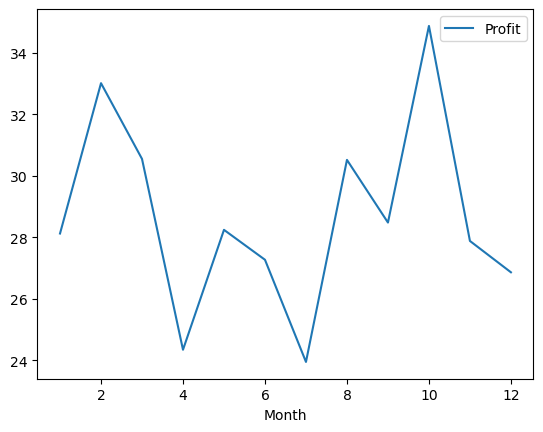

In [191]:
profit_and_month= df.pivot_table(index= 'month_posted', values='Profit', aggfunc='mean').reset_index()
profit_and_month.columns=['Month', 'Profit']
profit_and_month.plot(kind='line', x='Month', y='Profit')

<Axes: xlabel='Year'>

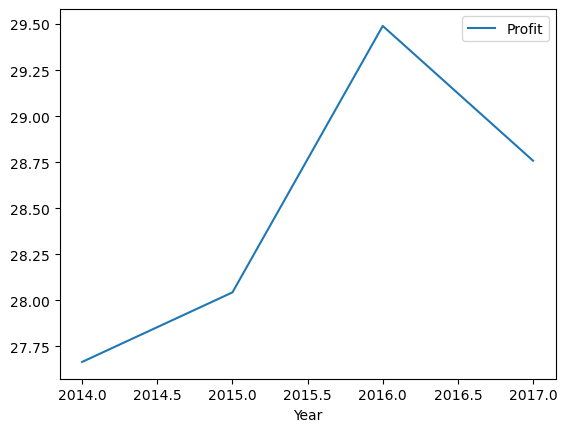

In [192]:
profit_and_year= df.pivot_table(index= 'year_posted', values='Profit', aggfunc='mean').reset_index()
profit_and_year.columns=['Year', 'Profit']
profit_and_year.plot(kind='line', x='Year', y='Profit')

We observe noise from the temporal analysis based on weekly data, but in months we obtain some peaks in which we observe stationarity

In [198]:
df[['Region', 'Profit']]
region_qp= df.pivot_table(index='Region', values=['Quantity','Profit'], aggfunc=['sum','mean']).reset_index()
region_qp.columns=['Region','Quantity_total','Quantity_mean', 'profit/m_total','profit/m_mean']
qty=region_qp[['Region','Quantity_total', 'profit/m_mean']].sort_values(by='Quantity_total',ascending=False).head(10)
qty

,Region,Quantity_total,profit/m_mean
21,Western Europe,218433.50850,3.784124
7,Eastern Asia,167101.85100,3.758214
16,Southern Asia,159336.42700,3.430885
3,Central America,158981.64816,3.718305
12,Oceania,120089.11200,3.681675
22,Western US,108418.44890,3.829535
9,Eastern US,91522.78000,3.728230
11,Northern Europe,83923.91700,3.710073
8,Eastern Europe,77084.88000,2.360366
17,Southern Europe,70109.41800,3.725035


In [199]:
price=region_qp[['Region','profit/m_mean']].sort_values(by='profit/m_mean',ascending=False).head(10)
price

,Region,profit/m_mean
18,Southern US,3.832716
22,Western US,3.829535
13,South America,3.796854
21,Western Europe,3.784124
5,Central US,3.779595
14,Southeastern Asia,3.778204
7,Eastern Asia,3.758214
9,Eastern US,3.728230
1,Caribbean,3.727219
17,Southern Europe,3.725035


We can say that the regions with a large volume of orders are not necessarily the most profitable regions. An example of this is Western Europe, which has the highest number of orders (quantity) but ranks fourth in terms of average profit.

In [202]:
df[['Country', 'Profit']]
country_qp= df.pivot_table(index='Country', values=['Quantity','Profit'], aggfunc=['sum','mean']).reset_index()
country_qp.columns=['Country','Quantity_total','Quantity_mean', 'profit/m_total','profit/m_mean']
qty=country_qp[['Country','Quantity_total', 'profit/m_mean']].sort_values(by='profit/m_mean',ascending=False).head(5)
qty

,Country,Quantity_total,profit/m_mean
129,Slovenia,590.04000,6.666667
78,Kuwait,317.16000,6.000000
28,Chad,90.00000,5.500000
119,Republic of the Congo,280.74000,5.000000
92,Martinique,1114.21104,4.880000


<Axes: xlabel='Returned', ylabel='Profit'>

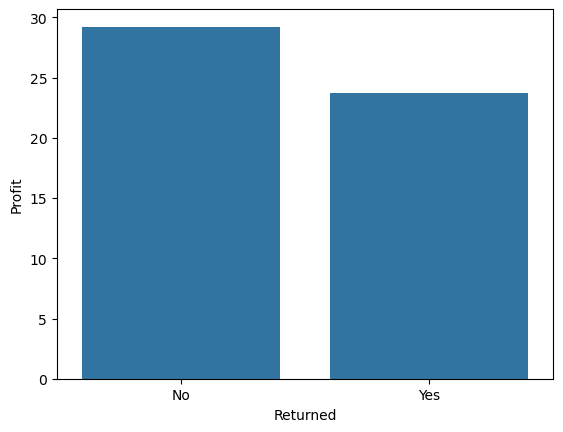

In [283]:
returned_rep= df.pivot_table(index=['Returned'], values='Profit', aggfunc='mean').reset_index()
returned_rep.columns=['Returned', 'Profit']
sns.barplot(returned_rep, x="Returned", y="Profit")

<Axes: xlabel='Returned', ylabel='Shipping_Cost'>

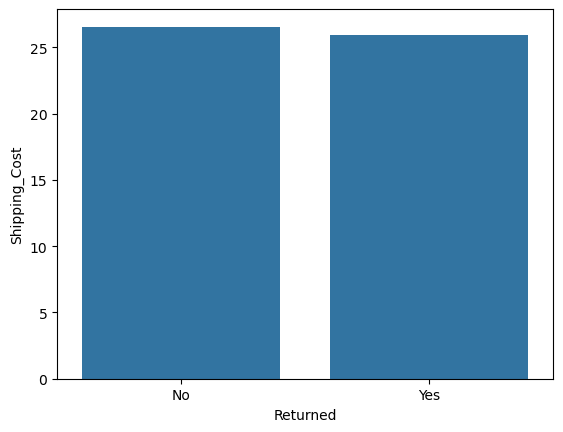

In [284]:
returned_rep= df.pivot_table(index=['Returned'], values='Shipping_Cost', aggfunc='mean').reset_index()
returned_rep.columns=['Returned', 'Shipping_Cost']
sns.barplot(returned_rep, x="Returned", y="Shipping_Cost")

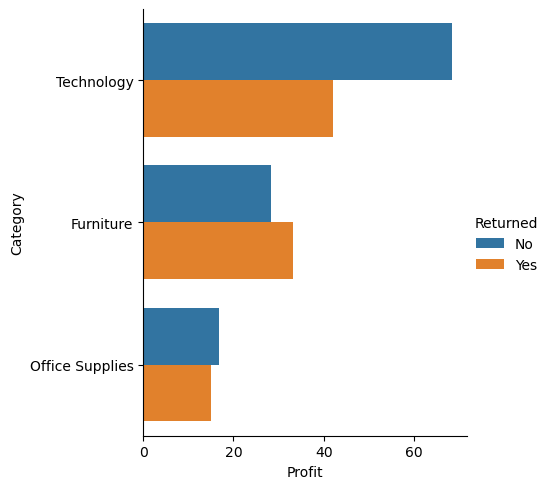

In [281]:
category_rep= df.pivot_table(index=['Category','Returned'], values='Profit', aggfunc='mean').reset_index()
category_rep.columns=['Category','Returned', 'Profit']
category_rep = category_rep.sort_values(by='Profit', ascending=False)
sns.catplot(category_rep, x="Profit", y="Category", kind="bar", hue="Returned")

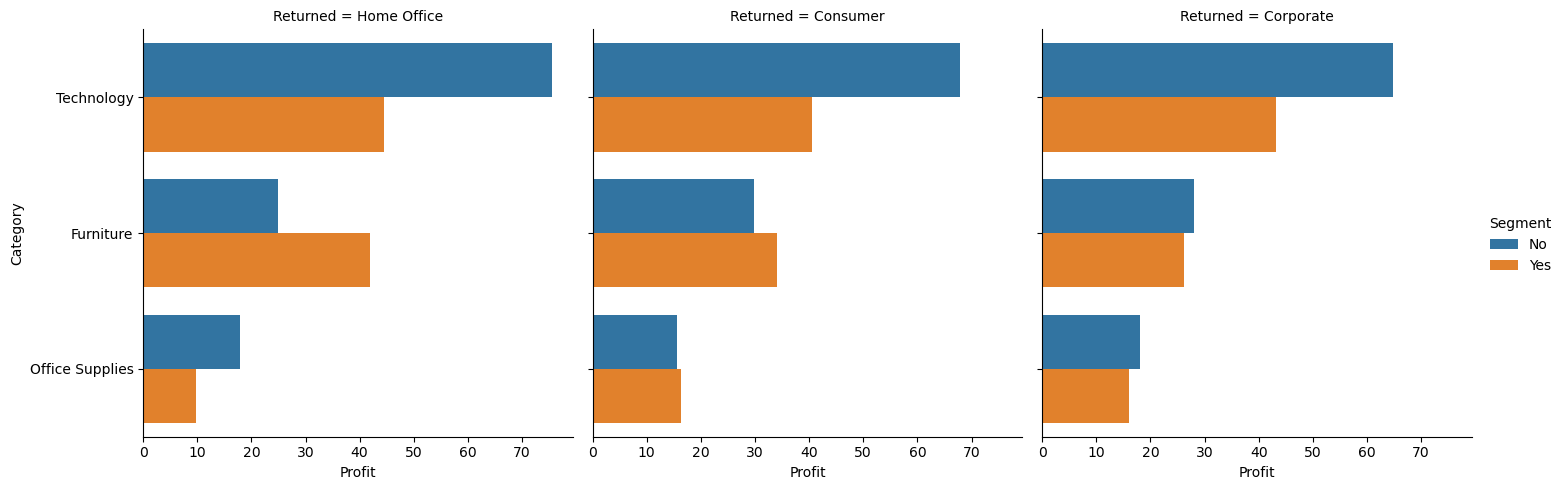

In [292]:
category_seg= df.pivot_table(index=['Category','Segment','Returned'], values='Profit', aggfunc='mean').reset_index()
category_seg.columns=['Category','Returned','Segment', 'Profit']
category_seg = category_seg.sort_values(by='Profit', ascending=False)
sns.catplot(category_seg, x="Profit", y="Category", kind="bar", hue="Segment", col="Returned")

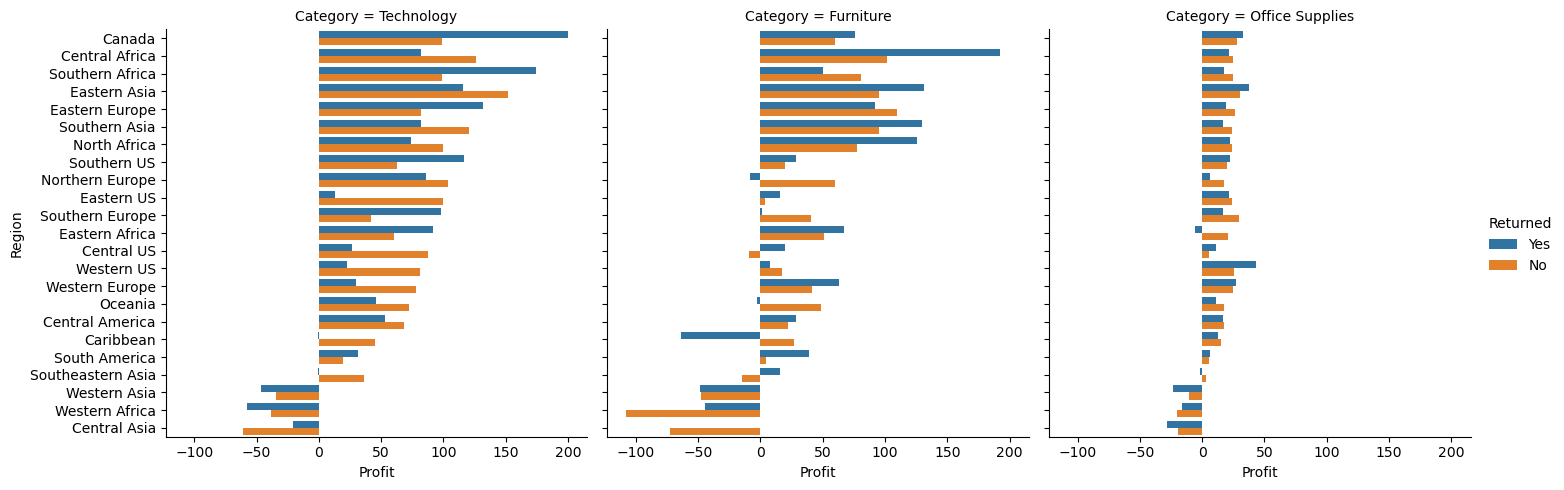

In [290]:
region_rep= df.pivot_table(index=['Region','Returned','Category'], values='Profit', aggfunc='mean').reset_index()
region_rep.columns=['Region','Returned','Category', 'Profit']
region_rep = region_rep.sort_values(by='Profit', ascending=False)
sns.catplot(region_rep, x="Profit", y="Region", kind="bar", hue="Returned", col="Category")

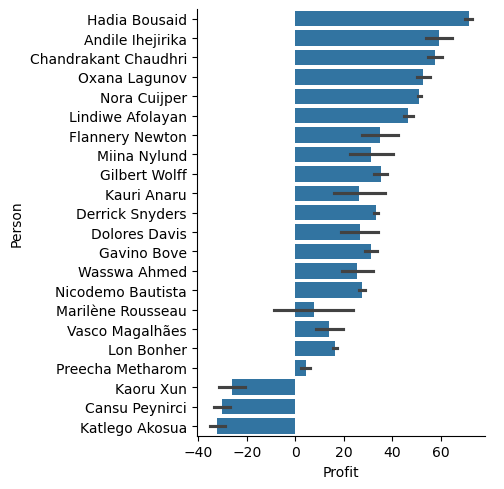

In [279]:
sales_rep= df.pivot_table(index=['Person','Returned'], values='Profit', aggfunc='mean').reset_index()
sales_rep.columns=['Person','Returned', 'Profit']
sales_rep = sales_rep.sort_values(by='Profit', ascending=False)
sns.catplot(sales_rep, x="Profit", y="Person", kind="bar")

### 4. Conclusions

Categories like technology are worthwhile ano matter at which segment to point and in regions like Asia (East) and Africa (South, Central) is where we have the opportinity to invest and it is not like this in regions like Africa or Asia Western

Based on this, we can see that technology items which are not returned are more profitable. However, as we dig deeper into each category or from a regional perspective, we see an opportunity in returned products to focus more on categories like furniture.